In [35]:
from MLDA.imports.DA_modules import *

# 0. Loading Data, First Look and Choose Categorical/Numerical columns

In [36]:
# read the data
# data_input = pd.read_excel('/home/jesper/Work/MLDA_app/MLDA/input_data/ENB2012_data.xlsx')
data_input = pd.read_csv('/home/jesper/Work/MLDA_app/MLDA/input_data/Outlet_sales.csv')
data_input.head(40)

# column names
for column in data_input.columns:
    print(column)
    
# If no 'column names' or 'wrong names' in data_input, changes these

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


Item_Identifier
Item_Weight
Item_Fat_Content
Item_Visibility
Item_Type
Item_MRP
Outlet_Identifier
Outlet_Establishment_Year
Outlet_Size
Outlet_Location_Type
Outlet_Type
Item_Outlet_Sales


## 0.1 Choosing the relevant variables

In [37]:
data_input.head() # Columns to choose from
choose_var = [1,2,3,4,5,8, 10,11] # First column: 0
data = data_input.iloc[:, choose_var]
data.head(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,High,Supermarket Type1,994.7052
5,10.395,Regular,0.000000,Baking Goods,51.4008,Medium,Supermarket Type2,556.6088
6,13.650,Regular,0.012741,Snack Foods,57.6588,High,Supermarket Type1,343.5528
7,NaN,Low Fat,0.127470,Snack Foods,107.7622,Medium,Supermarket Type3,4022.7636
8,16.200,Regular,0.016687,Frozen Foods,96.9726,NaN,Supermarket Type1,1076.5986
9,19.200,Regular,0.094450,Frozen Foods,187.8214,NaN,Supermarket Type1,4710.5350


## 0.2 Separating data in cat/num classes and x/y classes, and a combination of these

In [38]:
# Pick column numbers from data, NOT from data_input, first column is 0 (zero)
categoric_x = [1,3,5,6]
numeric_x = [0,2,4]
categoric_y = []
numeric_y = [7]

################ Calc below ###############
input_classes = {} # init a dict
x = categoric_x + numeric_x
y = categoric_y + numeric_y
categoric = categoric_x + categoric_y
numeric = numeric_x + numeric_y

# Adding to the dict
input_classes['cx'] = categoric_x
input_classes['nx'] = numeric_x
input_classes['x'] = x
input_classes['cy'] = categoric_y
input_classes['ny'] = numeric_y
input_classes['y'] = y
input_classes['c'] = categoric
input_classes['n'] = numeric
categoric

[1, 3, 5, 6]

### 0.2.1 Convert the categorical data dtype to 'category' 

In [39]:
for entry in categoric:
    data.iloc[:, entry] = data.iloc[:, entry].astype("category")

In [40]:
# Checking that the data are of the correct dtype
data['Item_Fat_Content'].dtype.name

'category'

### 0.2.2 Creating new names based on the type of the variable - i.e is it x or y and is it categorical or numerical

In [41]:
# Store the original column names and order
col_orig = data.columns

# Creating new names based on x, y and categoric, numeric
col_xc = ['xc'+str(num+1) for num, item in enumerate(input_classes['cx'])] # the item part is not used
col_xn = ['xn'+str(num+1) for num, item in enumerate(input_classes['nx'])] 
col_yc = ['yc'+str(num+1) for num, item in enumerate(input_classes['cy'])] 
col_yn = ['yn'+str(num+1) for num, item in enumerate(input_classes['ny'])] 
col_xy = col_xc + col_xn + col_yc + col_yn

print('col_orig:' ,col_orig)
print('x+y:', x+y)
print('col_xy:' ,col_xy)

# Transferring the right (original) ordering of the variables to the new names (x, y)
order_orig =[]

for order, item in enumerate(x+y):
    print(order, item)

# The Approach for the loop below:
# for each item in our new-name-list (col_xy) we find the original place/order of that item
# by looping through each number in the 'x+y'-list. The number in the 'x+y'-list is the 
# original order of the items in the new-name-list (col_xy). By picking that number - for example
# say 0, which say is in the 5'th place, we know by looking in col_xy at 5'th place that this item
# was original the first one. We then append this item as the first one to the list: order_orig.
# Then we pick number two, which is 1, etc

# we loop through each number from 0 to total number of columns, len(x+y)
for num in range(len(x+y)):
    # So we find 0 first...
    for order, item in enumerate(x+y):
        # pick 0 in list: x+y: let's say it is in the 5th place
        if item == num:
            # then in col_xy in the 5th place we know that this item was orig the first one 
            order_orig.append(col_xy[order])

# we restore the original order by replacing col_xy with order_orig
col_xy = order_orig

data

col_orig: Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
x+y: [1, 3, 5, 6, 0, 2, 4, 7]
col_xy: ['xc1', 'xc2', 'xc3', 'xc4', 'xn1', 'xn2', 'xn3', 'yn1']
0 1
1 3
2 5
3 6
4 0
5 2
6 4
7 7


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,NaN,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,High,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,NaN,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Supermarket Type2,1845.5976


# 1. Data Munging

## 1.1 Getting an Overview
__Conclusion based on cell below:__ <br>
1) write... <br>
2) write... <br>

In [42]:
# Check the percentage of missing values (NaN values) for each parameter
data.isnull().sum()/len(data)*100
# Conclusion: Item_weight and Outlet_size has missing values: 17% and 28 %, respevtively

data.describe()
data.info()

for column in data.columns:
    data[column].value_counts()

Item_Weight          17.165317
Item_Fat_Content      0.000000
Item_Visibility       0.000000
Item_Type             0.000000
Item_MRP              0.000000
Outlet_Size          28.276428
Outlet_Type           0.000000
Item_Outlet_Sales     0.000000
dtype: float64

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
Item_Weight          7060 non-null float64
Item_Fat_Content     8523 non-null category
Item_Visibility      8523 non-null float64
Item_Type            8523 non-null category
Item_MRP             8523 non-null float64
Outlet_Size          6113 non-null category
Outlet_Type          8523 non-null category
Item_Outlet_Sales    8523 non-null float64
dtypes: category(4), float64(4)
memory usage: 301.0 KB


12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

172.0422    7
188.1872    6
170.5422    6
109.5228    6
196.5084    6
           ..
212.8218    1
190.3872    1
162.6868    1
189.1214    1
51.3008     1
Name: Item_MRP, Length: 5938, dtype: int64

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
             ..
3167.8764     1
2226.4352     1
1684.4740     1
1574.6170     1
6692.6216     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

## 1.2 Munging the relevant columns

Here we munge the 2 columns: Item_Fat_Content and Item_Visibility

In [43]:
data.isnull().sum()/len(data)*100

# Item_Visibility: we make the zeroes to NaN
data.loc[:, 'Item_Visibility'].mean()
data.loc[:, 'Item_Visibility'] = data.loc[:, 'Item_Visibility'].replace(0.000000, np.nan)
mean_item_vis = data.loc[:, 'Item_Visibility'].mean() # Now mean value has changed
data.loc[:, 'Item_Visibility'].mean()

# Item_Fat_content: we make the LF to Low Fat etc, so that we only have Low Fat and Regular
data.loc[:'Item_Fat_Content'] = data.loc[:'Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat':'Low Fat', 'reg': 'Regular'})

# And we drop the folowing columns
# train.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year','Outlet_Location_Type'], axis=1, inplace=True)
data.isnull().sum()/len(data)*100


# Results
data.head(40)
data.info()

for column in data.columns:
    data[column].value_counts()

Item_Weight          17.165317
Item_Fat_Content      0.000000
Item_Visibility       0.000000
Item_Type             0.000000
Item_MRP              0.000000
Outlet_Size          28.276428
Outlet_Type           0.000000
Item_Outlet_Sales     0.000000
dtype: float64

0.06613202877895107

0.070481840850694

Item_Weight          17.165317
Item_Fat_Content      0.000000
Item_Visibility       6.171536
Item_Type             0.000000
Item_MRP              0.000000
Outlet_Size          28.276428
Outlet_Type           0.000000
Item_Outlet_Sales     0.000000
dtype: float64

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Supermarket Type1,2097.2700
3,19.200,Regular,NaN,Fruits and Vegetables,182.0950,NaN,Grocery Store,732.3800
4,8.930,Low Fat,NaN,Household,53.8614,High,Supermarket Type1,994.7052
5,10.395,Regular,NaN,Baking Goods,51.4008,Medium,Supermarket Type2,556.6088
6,13.650,Regular,0.012741,Snack Foods,57.6588,High,Supermarket Type1,343.5528
7,NaN,Low Fat,0.127470,Snack Foods,107.7622,Medium,Supermarket Type3,4022.7636
8,16.200,Regular,0.016687,Frozen Foods,96.9726,NaN,Supermarket Type1,1076.5986
9,19.200,Regular,0.094450,Frozen Foods,187.8214,NaN,Supermarket Type1,4710.5350


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
Item_Weight          7060 non-null float64
Item_Fat_Content     8523 non-null object
Item_Visibility      7997 non-null float64
Item_Type            8523 non-null category
Item_MRP             8523 non-null float64
Outlet_Size          6113 non-null category
Outlet_Type          8523 non-null category
Item_Outlet_Sales    8523 non-null float64
dtypes: category(3), float64(4), object(1)
memory usage: 359.1+ KB


12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

0.076975    3
0.107274    2
0.104784    2
0.058919    2
0.076792    2
           ..
0.092576    1
0.067544    1
0.115168    1
0.146896    1
0.037218    1
Name: Item_Visibility, Length: 7879, dtype: int64

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

172.0422    7
188.1872    6
170.5422    6
109.5228    6
196.5084    6
           ..
212.8218    1
190.3872    1
162.6868    1
189.1214    1
51.3008     1
Name: Item_MRP, Length: 5938, dtype: int64

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

958.7520     17
1342.2528    16
1845.5976    15
703.0848     15
1278.3360    14
             ..
3167.8764     1
2226.4352     1
1684.4740     1
1574.6170     1
6692.6216     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

## 1.3 Ordinal data --> numeric data

If we have any ordinal data in our categorical group we have to transform it into numbers, and move it to the numerical group.

__Ordinal data:__ Outlet_Size <br>
__Nominal data:__ Item_Fat_Content, Item_Type, Outlet_Location_Type, Outlet_Type

In [44]:
# Ordinal data - Outlet_Size, ref.PML p.113
data['Outlet_Size']

size_mapping = {
                'Small': 1,
                'Medium': 2,
                'High': 3
}

data['Outlet_Size'] = data.loc[:, ('Outlet_Size')].map(size_mapping)
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: category
Categories (3, object): [High, Medium, Small]

/home/jesper/anaconda3/envs/MLDA_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


0         2
1         2
2         2
3       NaN
4         3
       ... 
8518      3
8519    NaN
8520      1
8521      2
8522      1
Name: Outlet_Size, Length: 8523, dtype: category
Categories (3, int64): [3, 2, 1]

<br>
<hr>

# 2. Visualizing data / Exploratory Data Analysis (EDA) 

## 2.1 Start by Naming variables - original column names or x1, x2.., y1, y2.? Choose

Now before we display all our data we have the option to choose between 2 different namings of our variables. I.e. the long original name, or xc, xn, for categorial or numerical features, respectively.

In [45]:
name_as_x = 'no' # Set this to 'yes' or 'no'

if name_as_x == 'yes':
    data.columns = col_xy
else:
    data.columns = col_orig
# data
col_xy
col_orig

['xn1', 'xc1', 'xn2', 'xc2', 'xn3', 'xc3', 'xc4', 'yn1']

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## 2.2 Short naming - we make the option to pick a short name for some of the variables

In [46]:
df_xc = data.iloc[:, input_classes['cx']]
df_xn = data.iloc[:, input_classes['nx']]
df_yn = data.iloc[:, input_classes['ny']]
df_c = data.iloc[:, input_classes['c']]
df_n = data.iloc[:, input_classes['n']]
df_x = data.iloc[:, input_classes['x']]
df_y = data.iloc[:, input_classes['y']]

## 2.3 Generic Plots - plots which are generated automaticly

### 2.3.1 Visualising Numerical Variables

In [47]:
sns.set(style='whitegrid', palette="deep", font_scale=.9, rc={"figure.figsize": [8, 5]})

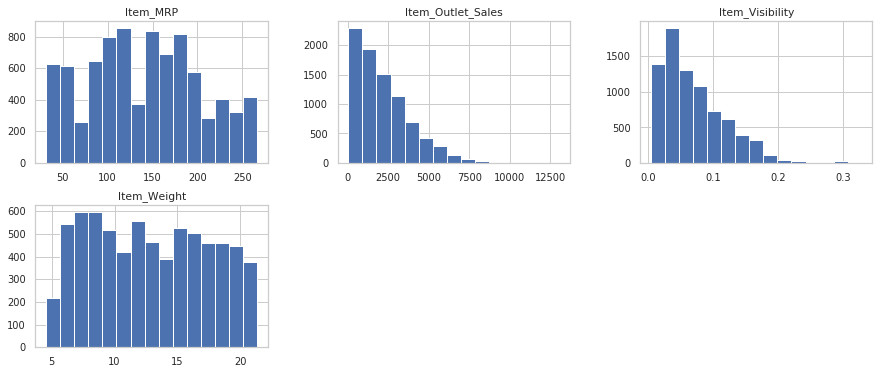

In [48]:
fig_num_rows = math.ceil(len(df_n.columns)/3)

df_n.hist(bins=15, figsize=(15, 6), layout=(fig_num_rows, 3));

### 2.3.2 Visualising Categorical Variables

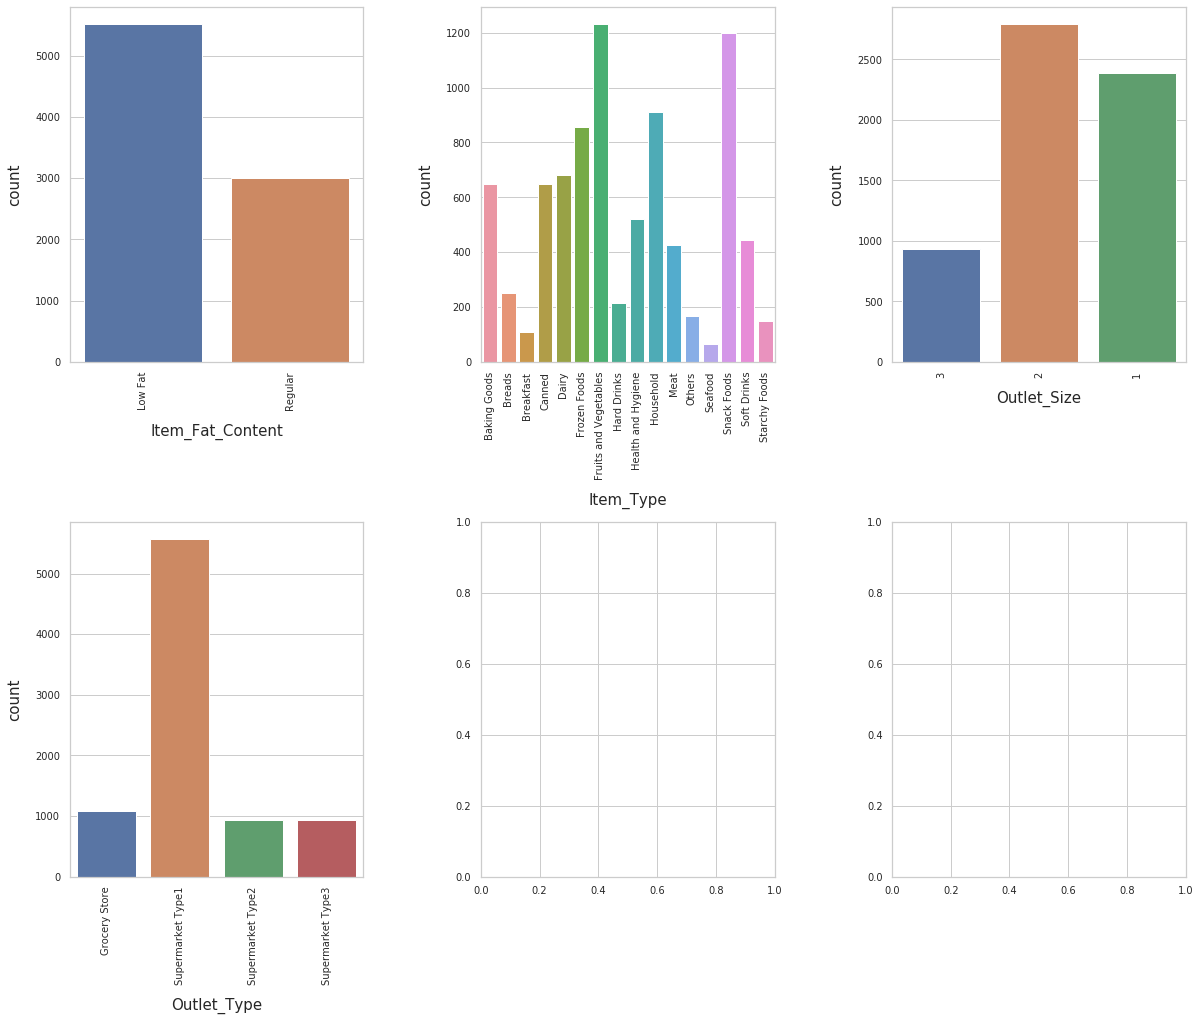

In [49]:
# Choose df_c or df_xc

from MLDA.plot_functions.functions import plotHistCatVar

plotHistCatVar(df_c)

### 2.3.3 Visualising Relationships Between Numerical Variables

/home/jesper/anaconda3/envs/MLDA_env/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/jesper/anaconda3/envs/MLDA_env/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/jesper/anaconda3/envs/MLDA_env/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/jesper/anaconda3/envs/MLDA_env/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/jesper/anaconda3/envs/MLDA_env/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degre

ZeroDivisionError: 0.0 cannot be raised to a negative power

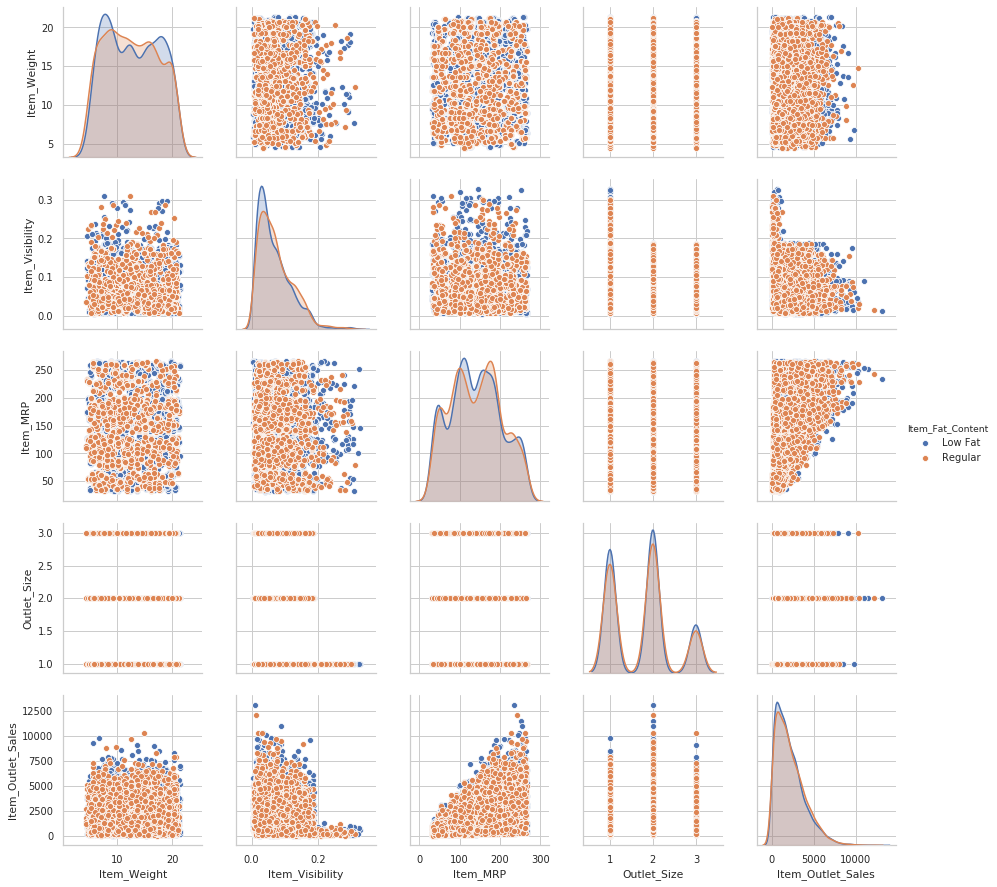

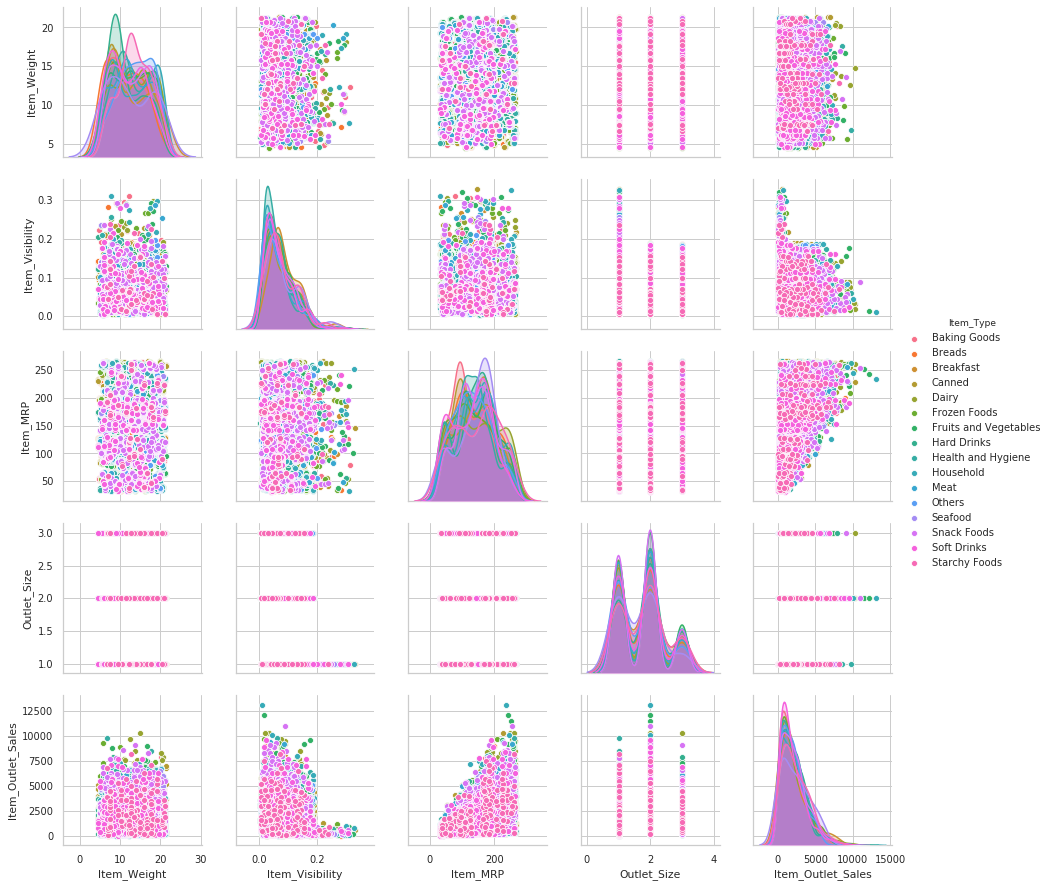

In [ ]:
# sns.pairplot(data)
def make_plot():
    for var in df_c.columns[:len(df_c.columns)]:
        sns.pairplot(data, hue=var)
    plt.show()
make_plot()

# Understanding the plot above:
# the plot above for one single var:
# sns.pairplot(data, hue='Outlet_Type')
# so we iterate through all the categorical columns names and use each of the categories as hue's

### 2.3.4 Visualising Relationships Between Numerical and Categorical Variables 

In [ ]:
# data.iloc[:, input_classes['y']].columns
# data.iloc[:,input_classes['cx']].columns
data.iloc[:,input_classes['c']].columns
df_c.columns

In [ ]:
# Boxplot of each of the categorial variables and the numeric variables
# Categorial classes ordered by numeric variable

from MLDA.plot_functions.functions import boxplotCategoric_vsNumeric

# Function: boxplotCategoric_vsNumeric(data, col_c, col_n)

# Choose either all categorical var vs all numerical var, 
# Or choose only X cat and Y num
# col_c=df_c.columns, col_n=df_n.columns

boxplotCategoric_vsNumeric(data, df_c.columns, df_n.columns)

## 2.4 Non-generic plots - plots where you have to choose variable parameters

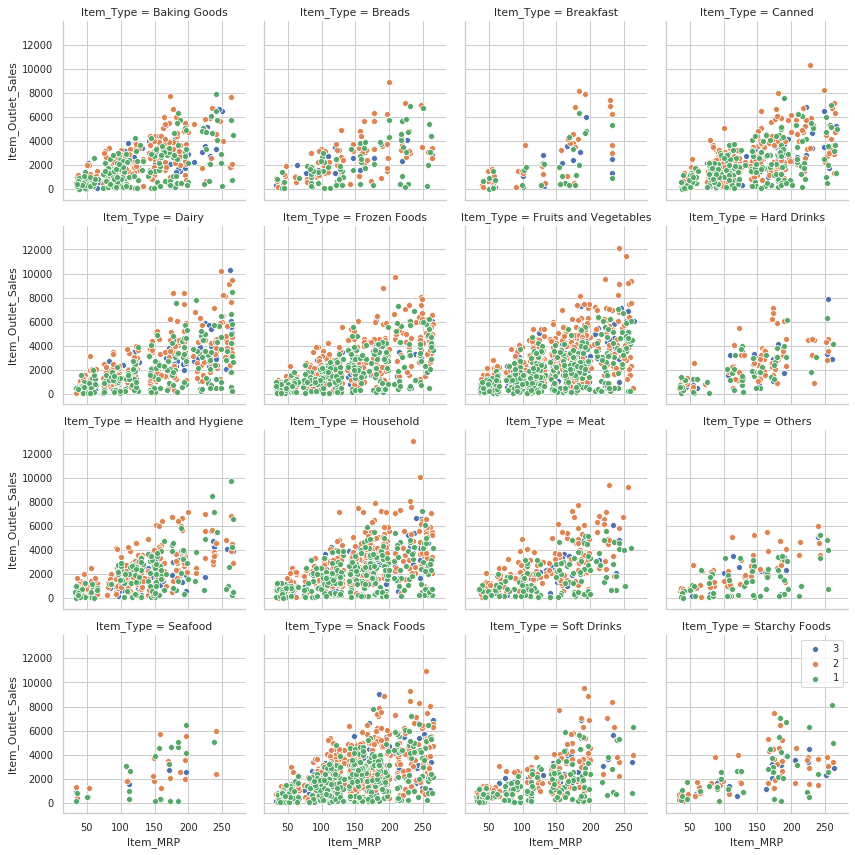

In [31]:
# # conditional relationships - the data is spread out
# col_orig
# col_xy

# Plot explanation: besides dataframe and col_wrap, this plot takes 4 inputs: 2 categorical and 2 numerical. Below
# is shown where to put the variables
# def plotChooseVars():
#     cond_plot = sns.FacetGrid(data=data, col='cat1_var', hue='cat2_var', col_wrap=4)
#     cond_plot.map(sns.scatterplot, 'num1_var', 'num2_var');

def plotChooseVars():
    cond_plot = sns.FacetGrid(data=data, col='Item_Type', hue='Outlet_Size', col_wrap=4)
    cond_plot.map(sns.scatterplot, 'Item_MRP', 'Item_Outlet_Sales');
    plt.legend(loc='upper right')
    plt.show()
plotChooseVars()

<br>
<hr>

# 3. Statistics

In [ ]:
x # features
y # dependent var
data.iloc[:, x] # we see we have text values in our categorical data
df_x.iloc[2]

In [ ]:
# check our data for unique values etc

# Check the percentage of missing values for each parameter
data.isnull().sum()/len(data)*100 # we have 3 columns with missing values 

# Based on the shown data we have 3 columns with some NaN values

data.describe()
data.info()

for column in data.columns:
    data[column].value_counts()

## 3.1 Heatmapping correlation and p-values

### 3.1.1 First we call the correlation function from corr_stats

In [51]:
from MLDA.corr_stats.corr_heatmap import correlation
c = df_c.columns.to_list() # categorical
n = df_n.columns.to_list() # numerical
corr = correlation(data, catcols=c, numcols=n, CI=.1, method_cc='Asym', method_nn='Spearmann')
corr[0] # correlation values
corr[1] # p values

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Fat_Content,0,0.0472813,NaN,NaN,0.0199583,0.0503003,p > CI,0.0152657
Item_Type,0.184329,0,NaN,NaN,0.116795,0.0889643,0.103576,0.0546271
Outlet_Size,NaN,NaN,0,0.342066,p > CI,0.116775,p > CI,0.202055
Outlet_Type,NaN,NaN,0.367669,0,p > CI,0.307707,p > CI,0.489169
Item_Weight,0.0199583,0.116795,p > CI,p > CI,0,-0.024423,0.0308216,p > CI
Item_Visibility,0.0503003,0.0889643,0.116775,0.307707,-0.024423,0,p > CI,-0.128103
Item_MRP,p > CI,0.103576,p > CI,p > CI,0.0308216,p > CI,0,0.562986
Item_Outlet_Sales,0.0152657,0.0546271,0.202055,0.489169,p > CI,-0.128103,0.562986,0


,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Type,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Fat_Content,1,0.00334032,NaN,NaN,0.0508845,4.02041e-06,0.575718,0.0839892
Item_Type,0.00274288,1,NaN,NaN,7.11417e-17,1.32547e-10,6.51437e-16,0.00038844
Outlet_Size,NaN,NaN,1,0.000633593,0.70036,3.0544e-18,0.725881,1.79127e-56
Outlet_Type,NaN,NaN,0.000714531,1,0.9479,1.05553e-172,0.882391,0
Item_Weight,0.0508845,7.11417e-17,0.70036,0.9479,1,0.0468498,0.00960022,0.205718
Item_Visibility,4.02041e-06,1.32547e-10,3.0544e-18,1.05553e-172,0.0468498,1,0.944813,1.29842e-30
Item_MRP,0.575718,6.51437e-16,0.725881,0.882391,0.00960022,0.944813,1,0
Item_Outlet_Sales,0.0839892,0.00038844,1.79127e-56,0,0.205718,1.29842e-30,0,1


### 3.1.2 Heatmapping the correlation values

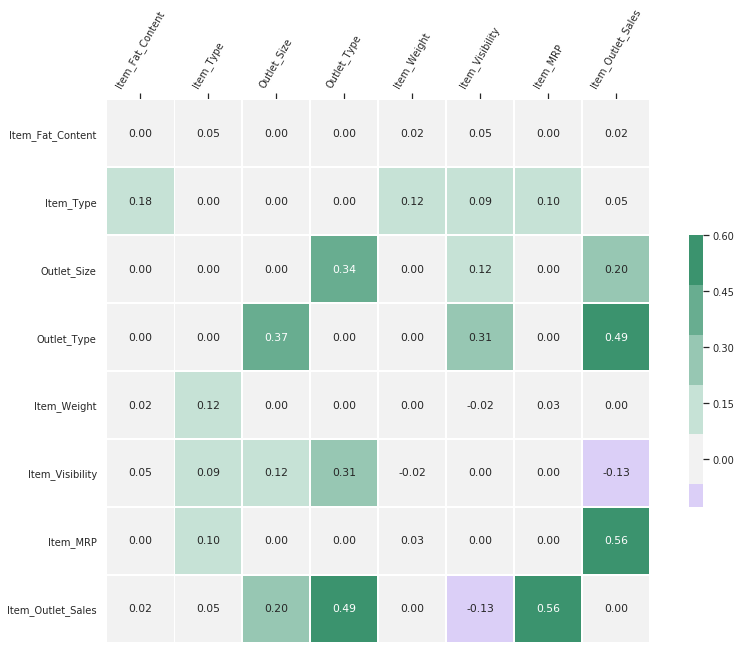

In [52]:
correlation = corr[0].loc[:, :].replace('p > CI', 0)
correlation = correlation.loc[:, :].fillna(0)

cmap = sns.diverging_palette(275, 150,s=80, l=55, n=9)
g = sns.heatmap(correlation, vmax=.6, center=0, square=True,
               linewidths=.5, cbar_kws={'shrink': .5}, annot=True,
               fmt='.2f', cmap=cmap)
# sns.despine()
g.figure.set_size_inches(14, 10)

# Due to bug in matplotlib 3.1.1
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)

# place xticks at the top
g.xaxis.set_ticks_position('top')
# rotate the top text
g.set_xticklabels(g.get_yticklabels(), rotation = 60);
plt.show();

### 3.1.3 Heatmapping the p values

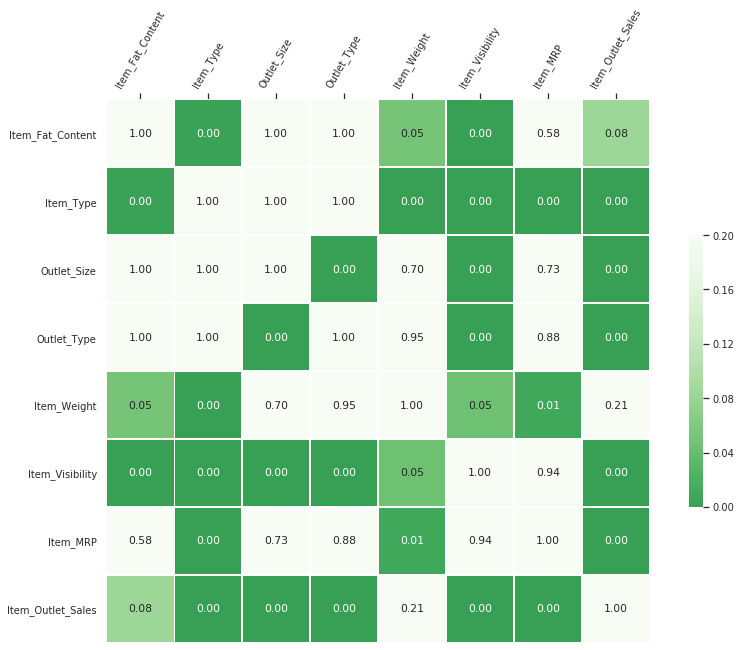

In [53]:
correlation = corr[1].loc[:, :].fillna(1)

g = sns.heatmap(correlation, vmax=.2, center=0.05, square=True,
               linewidths=.5, cbar_kws={'shrink': .5}, annot=True,
               fmt='.2f', cmap='Greens_r')
# sns.despine()
g.figure.set_size_inches(14, 10)

# Due to bug in matplotlib 3.1.1
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)

# place xticks at the top
g.xaxis.set_ticks_position('top')
# rotate the top text
g.set_xticklabels(g.get_yticklabels(), rotation = 60);
plt.show();

# Training our Model